In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
pd.set_option('display.max_columns', None)

In [2]:
# directory = './results/mdi_local.real_data_regression/diabetes_regression_parallel/varying_sample_row_n/'
# directory = './results/mdi_local.real_data_classification/diabetes_classification_parallel/varying_sample_row_n/'
directory = './results/mdi_local.real_data_regression/diabetes_regression/varying_sample_row_n'
folder_names = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    df = pd.read_csv(os.path.join(directory, f"seed{seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

In [3]:
# df = pd.read_csv("./results/mdi_local.real_data_regression/diabetes_regression/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_classification/diabetes_classification/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/satellite_new_implementation/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/satellite_image/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_classification/juvenile_new/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/ca_housing/varying_sample_row_n/seed331/results.csv")

In [4]:
pd.set_option('display.max_columns', None)
combined_df

,sample_row_n,sample_row_n_name,rep,n_estimators,min_samples_leaf,max_features,random_state,include_raw,cv_ridge,calc_loo_coef,sample_split,fit_on,model,fi,train_size,test_size,num_features,data_split_seed,test_all_mse,test_all_r2,sample_test_0,sample_test_1,sample_test_2,sample_test_3,sample_test_4,sample_test_5,sample_test_6,sample_test_7,sample_test_8,sample_test_9,sample_test_10,sample_test_11,sample_test_12,sample_test_13,sample_test_14,sample_test_15,sample_test_16,sample_test_17,sample_test_18,sample_test_19,sample_test_20,sample_test_21,sample_test_22,sample_test_23,sample_test_24,sample_test_25,sample_test_26,sample_test_27,sample_test_28,sample_test_29,sample_test_30,sample_test_31,sample_test_32,sample_test_33,sample_test_34,sample_test_35,sample_test_36,sample_test_37,sample_test_38,sample_test_39,sample_test_40,sample_test_41,sample_test_42,sample_test_43,sample_test_44,sample_test_45,sample_test_46,sample_test_47,sample_test_48,sample_test_49,sample_test_50,sample_test_51,sample_test_52,sample_test_53,sample_test_54,sample_test_55,sample_test_56,sample_test_57,sample_test_58,sample_test_59,sample_test_60,sample_test_61,sample_test_62,sample_test_63,sample_test_64,sample_test_65,sample_test_66,sample_test_67,sample_test_68,sample_test_69,sample_test_70,sample_test_71,sample_test_72,sample_test_73,sample_test_74,sample_test_75,sample_test_76,sample_test_77,sample_test_78,sample_test_79,sample_test_80,sample_test_81,sample_test_82,sample_test_83,sample_test_84,sample_test_85,sample_test_86,sample_test_87,sample_test_88,sample_test_89,sample_test_90,sample_test_91,sample_test_92,sample_test_93,sample_test_94,sample_test_95,sample_test_96,sample_test_97,sample_test_98,sample_test_99,ablation_seed_0,fi_time,RF_Regressor_train_MSE_before_ablation,RF_Regressor_train_R_2_before_ablation,RF_Regressor_train_MSE_after_ablation_1,RF_Regressor_train_R_2_after_ablation_1,RF_Regressor_train_MSE_after_ablation_2,RF_Regressor_train_R_2_after_ablation_2,RF_Regressor_train_MSE_after_ablation_3,RF_Regressor_train_R_2_after_ablation_3,RF_Regressor_train_MSE_after_ablation_4,RF_Regressor_train_R_2_after_ablation_4,RF_Regressor_train_MSE_after_ablation_5,RF_Regressor_train_R_2_after_ablation_5,RF_Regressor_train_MSE_after_ablation_6,RF_Regressor_train_R_2_after_ablation_6,RF_Regressor_train_MSE_after_ablation_7,RF_Regressor_train_R_2_after_ablation_7,RF_Regressor_train_MSE_after_ablation_8,RF_Regressor_train_R_2_after_ablation_8,RF_Regressor_train_MSE_after_ablation_9,RF_Regressor_train_R_2_after_ablation_9,RF_Regressor_train_MSE_after_ablation_10,RF_Regressor_train_R_2_after_ablation_10,Linear_train_MSE_before_ablation,Linear_train_R_2_before_ablation,Linear_train_MSE_after_ablation_1,Linear_train_R_2_after_ablation_1,Linear_train_MSE_after_ablation_2,Linear_train_R_2_after_ablation_2,Linear_train_MSE_after_ablation_3,Linear_train_R_2_after_ablation_3,Linear_train_MSE_after_ablation_4,Linear_train_R_2_after_ablation_4,Linear_train_MSE_after_ablation_5,Linear_train_R_2_after_ablation_5,Linear_train_MSE_after_ablation_6,Linear_train_R_2_after_ablation_6,Linear_train_MSE_after_ablation_7,Linear_train_R_2_after_ablation_7,Linear_train_MSE_after_ablation_8,Linear_train_R_2_after_ablation_8,Linear_train_MSE_after_ablation_9,Linear_train_R_2_after_ablation_9,Linear_train_MSE_after_ablation_10,Linear_train_R_2_after_ablation_10,XGB_Regressor_train_MSE_before_ablation,XGB_Regressor_train_R_2_before_ablation,XGB_Regressor_train_MSE_after_ablation_1,XGB_Regressor_train_R_2_after_ablation_1,XGB_Regressor_train_MSE_after_ablation_2,XGB_Regressor_train_R_2_after_ablation_2,XGB_Regressor_train_MSE_after_ablation_3,XGB_Regressor_train_R_2_after_ablation_3,XGB_Regressor_train_MSE_after_ablation_4,XGB_Regressor_train_R_2_after_ablation_4,XGB_Regressor_train_MSE_after_ablation_5,XGB_Regressor_train_R_2_after_ablation_5,XGB_Regressor_train_MSE_after_ablation_6,XGB_Regressor_train_R_2_after_ablation_6,XGB_Regressor_train_MSE_after_ablation_7,XGB_Regressor_

In [5]:
# Print the run-time of the feature importance algorithm
averages = combined_df.groupby('fi')['fi_time'].mean().reset_index()
print(averages)

                     fi     fi_time
0   Kernel_SHAP_RF_plus  277.088223
1   LFI_with_raw_OOB_RF    6.107385
2       LFI_with_raw_RF    6.842227
3  LFI_with_raw_RF_plus    1.639075
4          LIME_RF_plus  612.684298
5                MDI_RF    2.537897
6           TreeSHAP_RF    0.334840


In [6]:
# Print the ablation time
averages = combined_df.groupby('fi')['train_data_ablation_time'].mean().reset_index()
print(averages)

                     fi  train_data_ablation_time
0   Kernel_SHAP_RF_plus                 10.402297
1   LFI_with_raw_OOB_RF                 10.521922
2       LFI_with_raw_RF                 10.535834
3  LFI_with_raw_RF_plus                 10.385392
4          LIME_RF_plus                 10.394773
5                MDI_RF                 10.534780
6           TreeSHAP_RF                 10.418015


In [7]:
#################### Change the following according to the dataset ####################
task = "regression" #"regression" "classification"
########################################################################################
methods_rf = ["LFI_with_raw_RF", "LFI_with_raw_CV_RF", "LFI_with_raw_OOB_RF", "MDI_RF", "TreeSHAP_RF"]
methods_rf_plus = ["Kernel_SHAP_RF_plus","LFI_with_raw_RF_plus", "LIME_RF_plus"]
methods_all = methods_rf + methods_rf_plus
n_testsize = combined_df[['train_size', 'test_size']].drop_duplicates()
num_features = combined_df['num_features'].drop_duplicates()[0]
metrics = {"regression": ["MSE", "R_2"], "classification": ["AUROC","AUPRC", "F1"]}

In [8]:
if task == "classification":
    grouped = combined_df.groupby("model")
    for model, group_df in grouped:
        print("Model:", model)
        print("AUROC before ablation:", group_df["test_all_auc"].mean())
        print("AUPRC before ablation:", group_df["test_all_auprc"].mean())
        print("F1 before ablation:", group_df["test_all_f1"].mean())
        print()
elif task == "regression":
    grouped = combined_df.groupby("model")
    for model, group_df in grouped:
        print("Model:", model)
        print("MSE before ablation:", group_df["test_all_mse"].mean())
        print("R2 before ablation:", group_df["test_all_r2"].mean())
        print()

Model: RF
MSE before ablation: 3160.159277609703
R2 before ablation: 0.4474091923958154

Model: RF_plus
MSE before ablation: 3058.492966541393
R2 before ablation: 0.4653868933792268



In [9]:
ablation_models = {"regression": ["RF_Regressor", "Linear", "XGB_Regressor", "RF_Plus_Regressor"], "classification": ["RF_Classifier","Logistic", "SVM", "XGBoost_Classifier", "RF_Plus_Classifier"]}

# Training Data

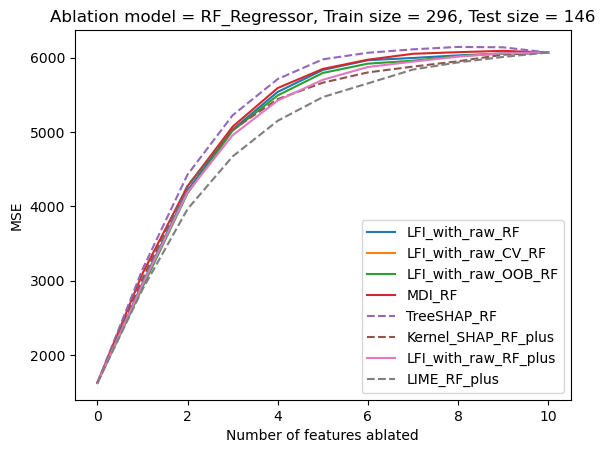

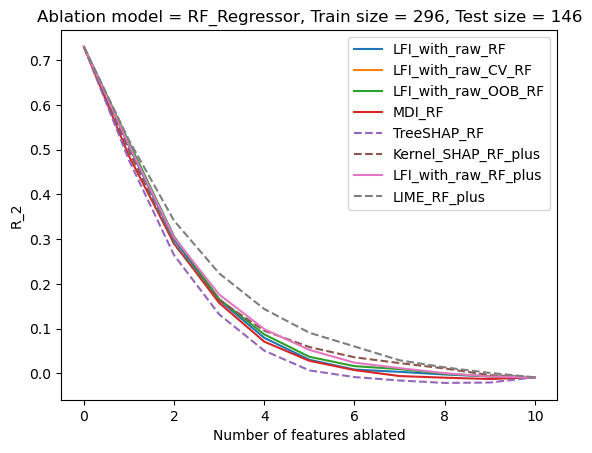

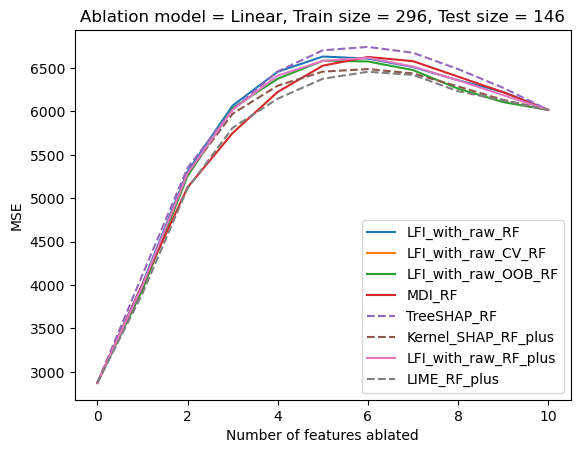

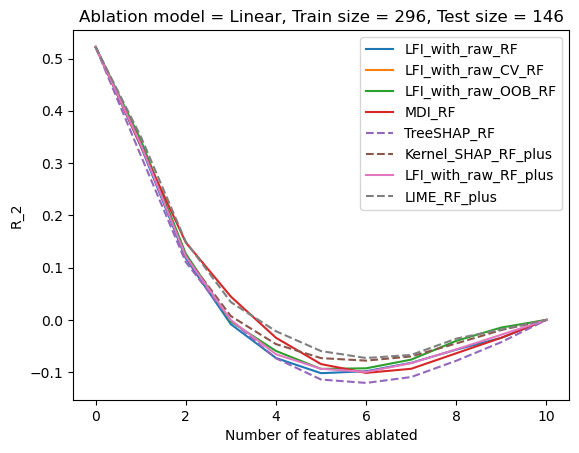

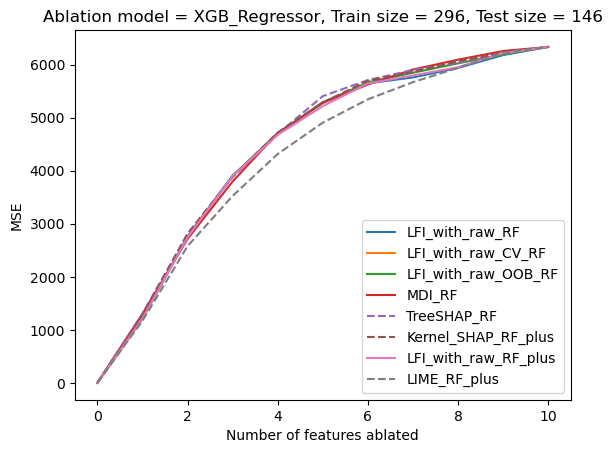

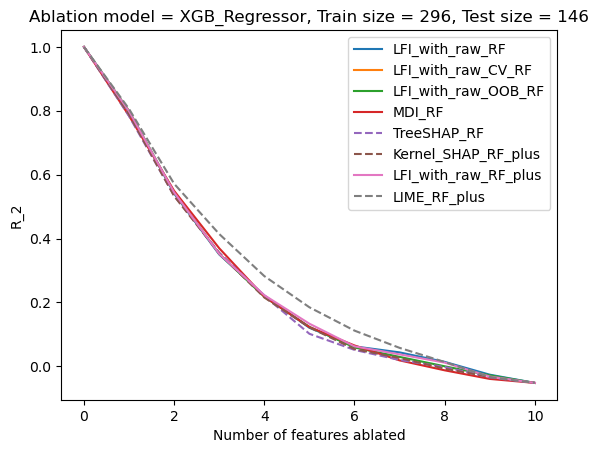

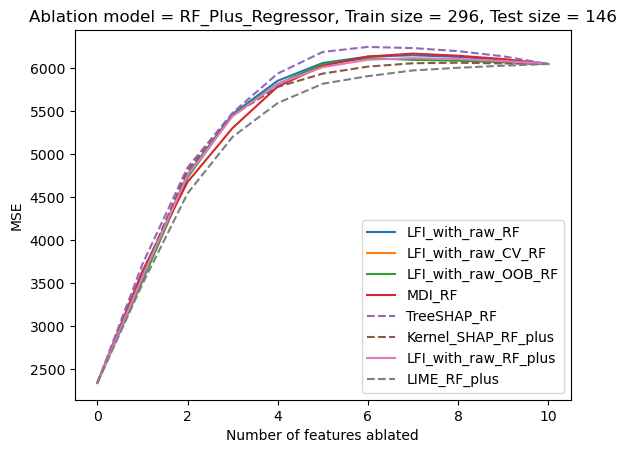

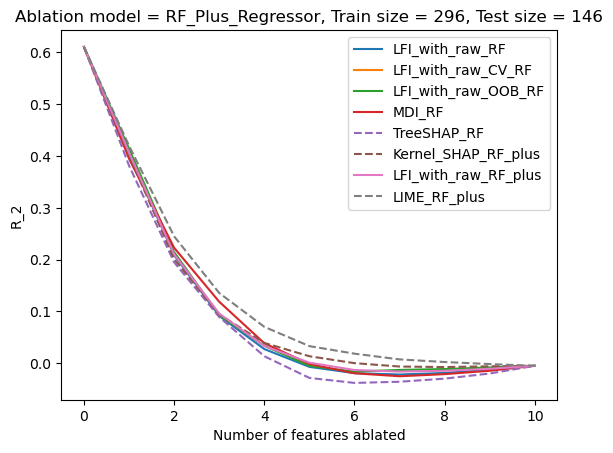

In [10]:
for a_model in ablation_models[task]:
    for metric in metrics[task]:
        results = {}
        for m in methods_all:
            results[m] = []
        for m in methods_all:
            results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_"+metric+f"_before_ablation"].mean())
            for i in range(num_features):
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_"+metric+f"_after_ablation_{i+1}"].mean())
        fig, ax = plt.subplots()
        for m in methods_all:
            if m in ["TreeSHAP_RF","Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
            else:
                ax.plot(range(num_features+1), results[m], label=m)
        ax.set(xlabel='Number of features ablated', ylabel=metric,
                title=f'Ablation model = {a_model}, Train size = {n_testsize["train_size"].values[0]}, Test size = {n_testsize["test_size"].values[0]}')
        ax.legend()
        # plt.savefig(f"ablation_fico.png")
        plt.show()

Test data

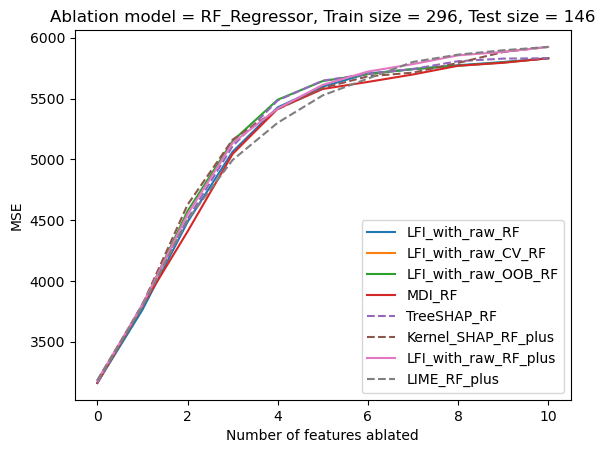

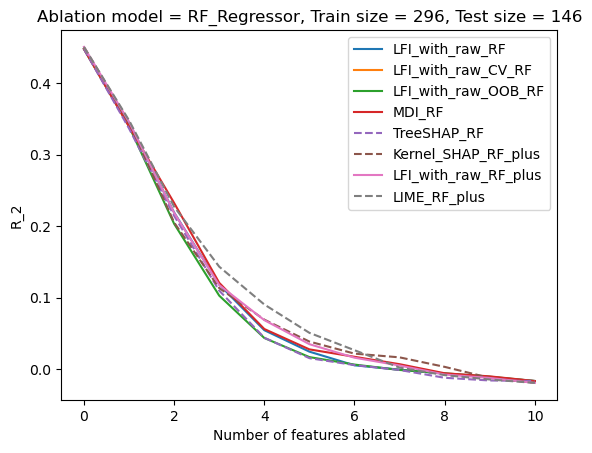

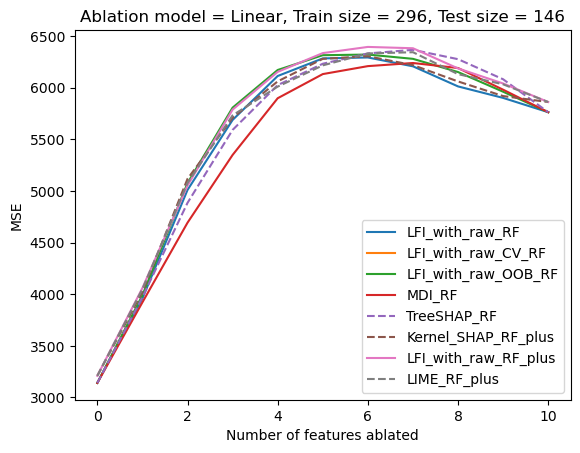

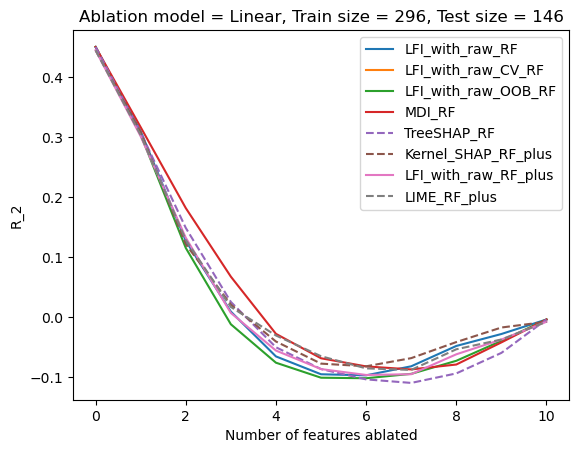

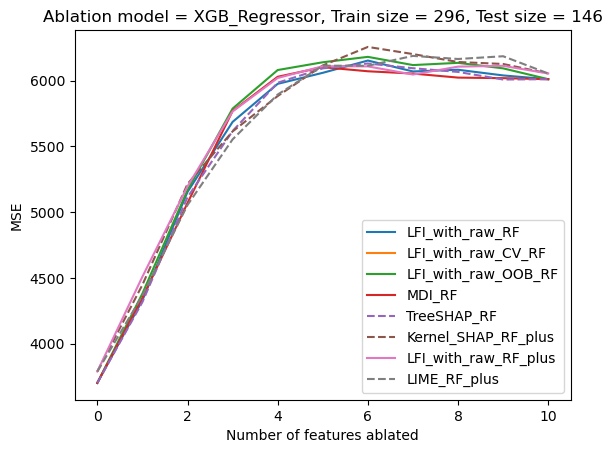

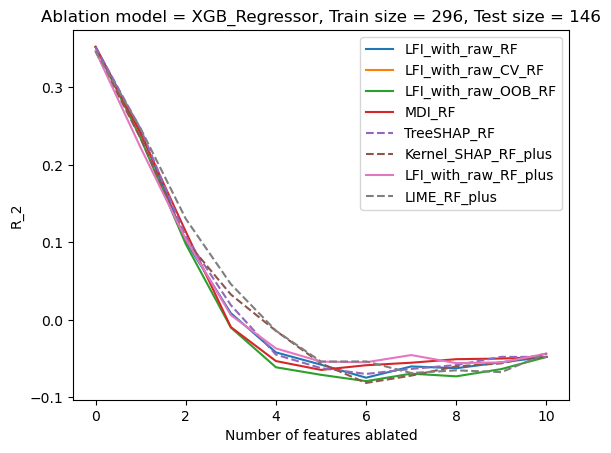

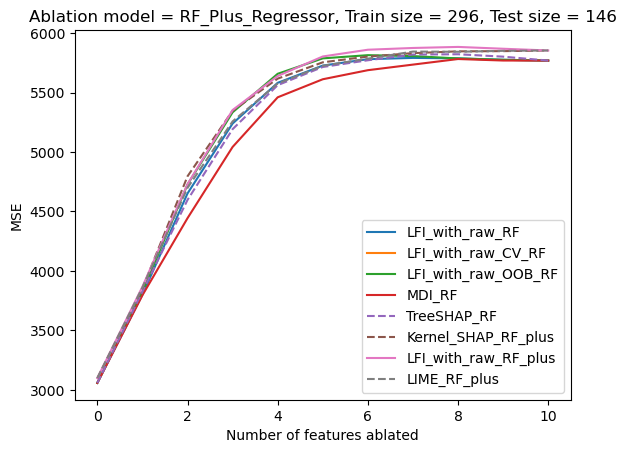

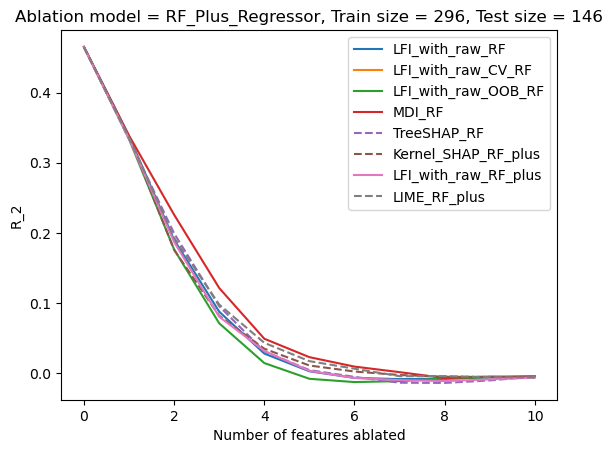

In [11]:
for a_model in ablation_models[task]:
    for metric in metrics[task]:
        results = {}
        for m in methods_all:
            results[m] = []
        for m in methods_all:
            results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation"].mean())
            for i in range(num_features):
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{i+1}"].mean())
        fig, ax = plt.subplots()
        for m in methods_all:
            if m in ["TreeSHAP_RF","Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
            else:
                ax.plot(range(num_features+1), results[m], label=m)
        ax.set(xlabel='Number of features ablated', ylabel=metric,
                title=f'Ablation model = {a_model}, Train size = {n_testsize["train_size"].values[0]}, Test size = {n_testsize["test_size"].values[0]}')
        ax.legend()
        # plt.savefig(f"ablation_fico.png")
        plt.show()